In [1]:
# datetime 数据类型学习目标
# 1、应用Pandas来处理日期时间类型数据

In [121]:
# 导入datatime包
from datetime import datetime

# 导入Pandas包
import pandas as pd

# 导入matplotlib包
import matplotlib.pyplot as plt

In [5]:
# 获取当前时间
datetime.now()

datetime.datetime(2024, 6, 18, 12, 25, 2, 260430)

In [6]:
# 创建一个时间对象
datetime(2021, 1, 1)

datetime.datetime(2021, 1, 1, 0, 0)

In [11]:
# 将Pandas中数据类型转换为datetime类型
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola
# 122列、18行，除Date、Day外其他字段都有缺失值

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 将Date列转换为datetime
ebola['Date'] = pd.to_datetime(ebola['Date'])
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,2014-03-26,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# 在加载的时候，通过parse_dates参数指定日期时间列
ebola = pd.read_csv('../data/country_timeseries.csv', parse_dates = [0]).iloc[:5, :5]
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               5 non-null      datetime64[ns]
 1   Day                5 non-null      int64         
 2   Cases_Guinea       4 non-null      float64       
 3   Cases_Liberia      3 non-null      float64       
 4   Cases_SierraLeone  4 non-null      float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 328.0 bytes


In [17]:
# 提取日期的各个部分
d = pd.to_datetime('2020-06-20')
d # Timestamp('2020-06-20 00:00:00')

Timestamp('2020-06-20 00:00:00')

In [18]:
d.year
d.month
d.day

20

In [19]:
ebola['year'] = ebola['Date'].dt.year
ebola['year']

0    2015
1    2015
2    2015
3    2015
4    2014
Name: year, dtype: int32

In [20]:
# 日期范围 date_range
head_range = pd.date_range(start='2014-12-31',end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# 2020年1月1日这周所有的工作日(使用date_range函数创建日期序列时，可以传入一个参数freq，默认情况下freq取值为D，表示日期范围内的值是逐日递增的。)
# Alias	        Description
# B	            工作日
# C	            自定义工作日
# D	            日历日
# W	            每周
# M	            月末
# SM	        月中和月末（每月第15天和月末）
# BM	        月末工作日
# CBM	        自定义月末工作日
# MS	        月初
# SMS	        月初和月中（每月第1天和第15天）
# BMS	        月初工作日
# CBMS	        自定义月初工作日
# Q	            季度末
# BQ	        季度末工作日
# QS	        季度初
# BQS	        季度初工作日
# A,Y	        年末
# BA,BY	        年末工作日
# AS,YS	        年初
# BAS,BYS	    年初工作日
# BH	        工作时间
# H	            小时
# T,min	        分钟
# S	            秒
# L,ms	        毫秒
# U,us	        microseconds
# N	            纳秒


pd.date_range('2020-01-01','2020-01-07',freq='B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07'],
              dtype='datetime64[ns]', freq='B')

In [24]:
# 隔一个工作日取一个工作日
pd.date_range('2020-01-01','2020-01-07',freq='2B')


DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-07'], dtype='datetime64[ns]', freq='2B')

In [25]:
# freq传入的参数可以传入多个

#2020年每个月的第一个星期四
# 星期几缩写：MON/TUE/WED/THU/FRI/SAT/SUN
# W-MON：从指定星期几开始算起，每周
pd.date_range('2020-01-01','2020-12-31',freq='WOM-1THU')

DatetimeIndex(['2020-01-02', '2020-02-06', '2020-03-05', '2020-04-02',
               '2020-05-07', '2020-06-04', '2020-07-02', '2020-08-06',
               '2020-09-03', '2020-10-01', '2020-11-05', '2020-12-03'],
              dtype='datetime64[ns]', freq='WOM-1THU')

In [26]:
#每个月的第三个星期五
pd.date_range('2020-01-01','2020-12-31',freq='WOM-3FRI')


DatetimeIndex(['2020-01-17', '2020-02-21', '2020-03-20', '2020-04-17',
               '2020-05-15', '2020-06-19', '2020-07-17', '2020-08-21',
               '2020-09-18', '2020-10-16', '2020-11-20', '2020-12-18'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [114]:
# datetime类型案例

# 某城市报警记录
crime = pd.read_csv('../data/crime.csv', parse_dates=['REPORTED_DATE'])

In [118]:
#设置报警时间为索引
crime = crime.set_index('REPORTED_DATE')
crime.head()


KeyError: "None of ['REPORTED_DATE'] are in the columns"

In [108]:
# 查看某一天的报警记录
print(crime.loc['2016-05-12'])

                             OFFENSE_TYPE_ID           OFFENSE_CATEGORY_ID  \
REPORTED_DATE                                                                
2016-05-12 23:51:00  criminal-mischief-other               public-disorder   
2016-05-12 18:40:00        liquor-possession                  drug-alcohol   
2016-05-12 22:26:00         traffic-accident              traffic-accident   
2016-05-12 20:35:00            theft-bicycle                       larceny   
2016-05-12 09:39:00   theft-of-motor-vehicle                    auto-theft   
...                                      ...                           ...   
2016-05-12 17:55:00       public-peace-other               public-disorder   
2016-05-12 19:24:00        threats-to-injure               public-disorder   
2016-05-12 22:28:00            sex-aslt-rape                sexual-assault   
2016-05-12 15:59:00   menacing-felony-w-weap            aggravated-assault   
2016-05-12 16:39:00               assault-dv  other-crimes-again

In [116]:
# 查看某一段时间的犯罪记录
print(crime.loc['2015-03-04':'2016-01-01'])

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [117]:
#  时间段可以包括小时分钟
crime.loc['2015-03-04 22':'2016-01-01 23:45:00'].sort_index()

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [74]:
# 查询凌晨两点到五点的报警记录
crime.between_time('2:00', '5:00')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [72]:
# 查看发生在某个时刻的犯罪记录
crime.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


In [82]:
# 分析每周报警记录(可以按照指定时间周期分组)
crime.resample('W')
# size查看分组大小
weekly_crimes = crime.resample('W').size()
weekly_crimes.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 300 entries, 2012-01-08 to 2017-10-01
Freq: W-SUN
Series name: None
Non-Null Count  Dtype
--------------  -----
300 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [95]:
len(crime.loc[:'2012-01-08'])

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [97]:

crime.loc['2012-01-09':'2012-01-15']


KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [98]:
crime.resample('W-THU').size()


REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

<Axes: title={'center': '丹佛犯罪情况'}, xlabel='REPORTED_DATE'>

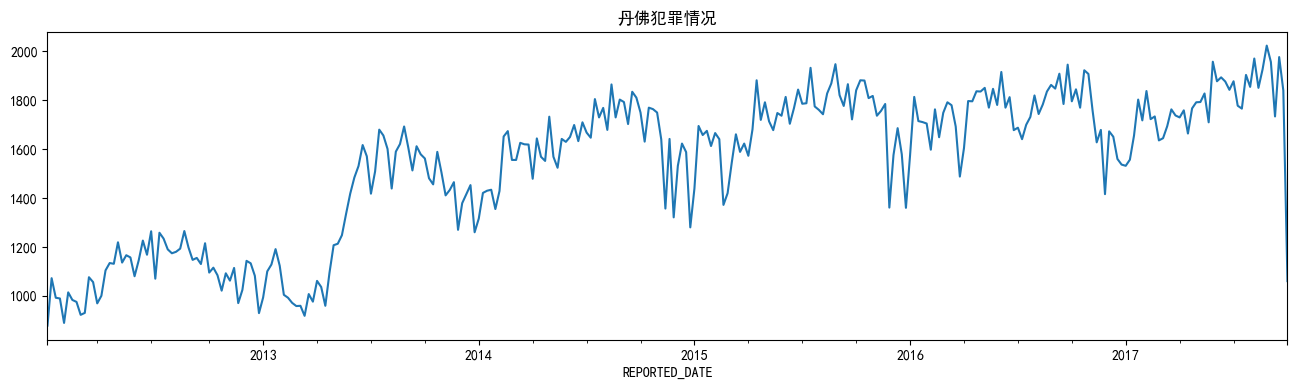

In [123]:
# 设置正常显示汉字和负号
plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示汉字
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

weekly_crimes.plot(figsize=(16,4),title='丹佛犯罪情况')


In [124]:
# 小结
# 1、Pandas中，datetime64用来表示时间序列类型
# 2、时间序列类型的数据可以作为行索引，对应的数据类型是DatetimeIndex类型
# 3、转换成时间序列类型后，可以按照时间的特点对数据进行处理
# 4、提取日期的各个部分（月，日，星期...)
# 5、进行日期运算
# 6、按照日期范围取值